# Setup

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Import Data

In [2]:
data=pd.read_csv('/Users/hongyu/Desktop/Customer Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print('Rows:',data.shape[0])
print('Columns:',data.shape[1])
print('Features:')
print(data.columns.tolist())

Rows: 7043
Columns: 21
Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
print('Missing Values:')
print(data.isnull().sum())

Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
print('Unique Values:')
print(data.nunique())

Unique Values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


# Data Cleaning

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [9]:
data.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [10]:
# Since SeniorCitizen should be in the form of Yes or No, we replaced 1 and 0 with Yes and No
data.SeniorCitizen=data.SeniorCitizen.apply(lambda x:'Yes' if x == 1 else 'No')

In [11]:
data.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [12]:
# Since tenure has a large spread and we don't think slight difference in tenure will affect the churn too much.
# We convert tenure into a categorical feature
data['tenure_indicator']=data.tenure.apply(lambda x:'Tenure_0-12' if x <=12 
                              else ('Tenure_12-24' if (x>12 and x<=24)
                                   else('Tenure_24-48' if x>24 and x<=48
                                       else('Tenure_48-60' if x >48 and x<=60 else 'Tenure_gt_60'))) )

In [13]:
data.tenure_indicator.value_counts()

Tenure_0-12     2186
Tenure_24-48    1594
Tenure_gt_60    1407
Tenure_12-24    1024
Tenure_48-60     832
Name: tenure_indicator, dtype: int64

In [14]:
data.TotalCharges.value_counts()

20.2       11
           11
19.75       9
20.05       8
19.65       8
19.9        8
45.3        7
19.55       7
20.15       6
20.25       6
19.45       6
20.45       5
20.3        5
19.85       4
19.4        4
49.9        4
74.7        4
20.35       4
19.95       4
44.4        4
75.3        4
20.5        4
50.15       4
19.3        4
69.65       4
70.6        4
69.95       4
69.6        4
19.2        4
20.4        4
           ..
7553.6      1
1296.8      1
704.3       1
6632.75     1
780.1       1
3351.55     1
1238.45     1
2043.45     1
19.05       1
5585.4      1
330.15      1
239         1
4362.05     1
679.55      1
1336.8      1
65.95       1
1929.95     1
1406.65     1
5293.4      1
4116.8      1
1031.4      1
4512.7      1
994.55      1
756.4       1
2674.15     1
240.45      1
248.95      1
224.5       1
577.15      1
417         1
Name: TotalCharges, Length: 6531, dtype: int64

In [15]:
# drop rows which has TotalCharges ' '
data=data[data.TotalCharges!=' ']
# Convert it to float type
data["TotalCharges"] = data["TotalCharges"].astype(float)

In [16]:
# Since we have InternetService feature, we replace 'No internet service' to 'No' for these features
data.DeviceProtection[data.DeviceProtection=='No internet service']='No'
data.OnlineBackup[data.OnlineBackup=='No internet service']='No'
data.MultipleLines[data.MultipleLines=='No internet service']='No'
data.OnlineSecurity[data.OnlineSecurity=='No internet service']='No'
data.TechSupport[data.TechSupport=='No internet service']='No'
data.StreamingMovies[data.StreamingMovies=='No internet service']='No'
data.StreamingTV[data.StreamingTV=='No internet service']='No'

/Users/hongyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/hongyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/U

In [17]:
data.MultipleLines[data.MultipleLines=='No phone service']='No'

/Users/hongyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Exploratory Data Analysis

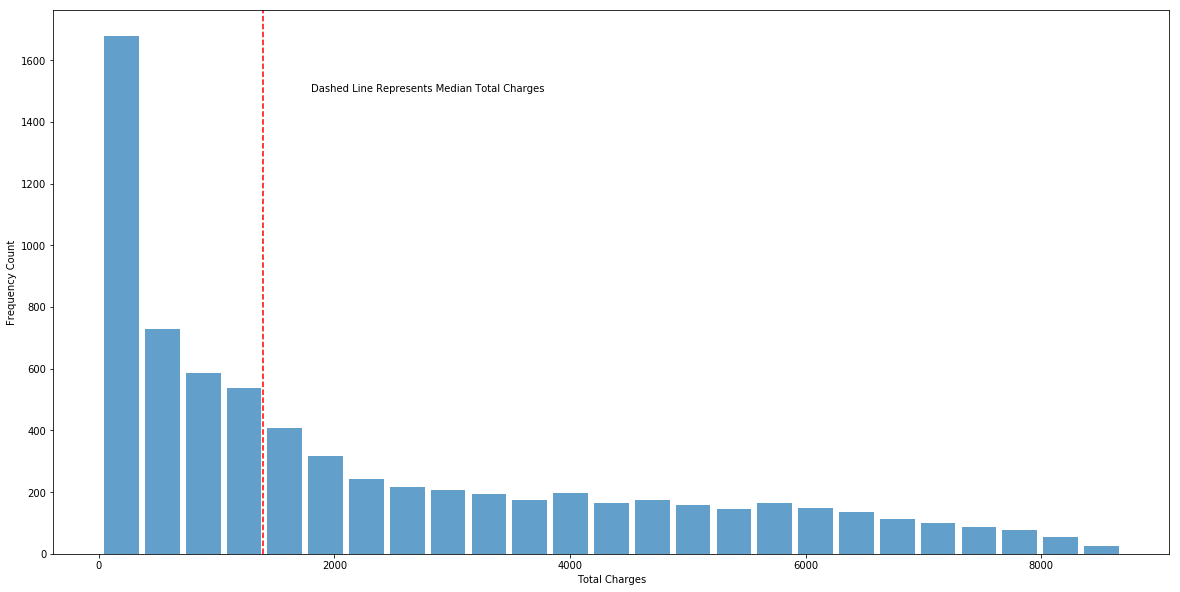

In [18]:
# Create Plot
plt.figure(figsize=(20,10))
n, bins, patches=plt.hist(data.TotalCharges,bins='auto', alpha=0.7, rwidth=0.85)
xlabel=plt.xlabel('Total Charges')
ylabel=plt.ylabel('Frequency Count')
plt.axvline(data.TotalCharges.median(), color='r',linestyle='dashed')
plt.text(1800,1500,'Dashed Line Represents Median Total Charges')
plt.show()

The dots in the center of each violin plot represent median Total Charge of each group


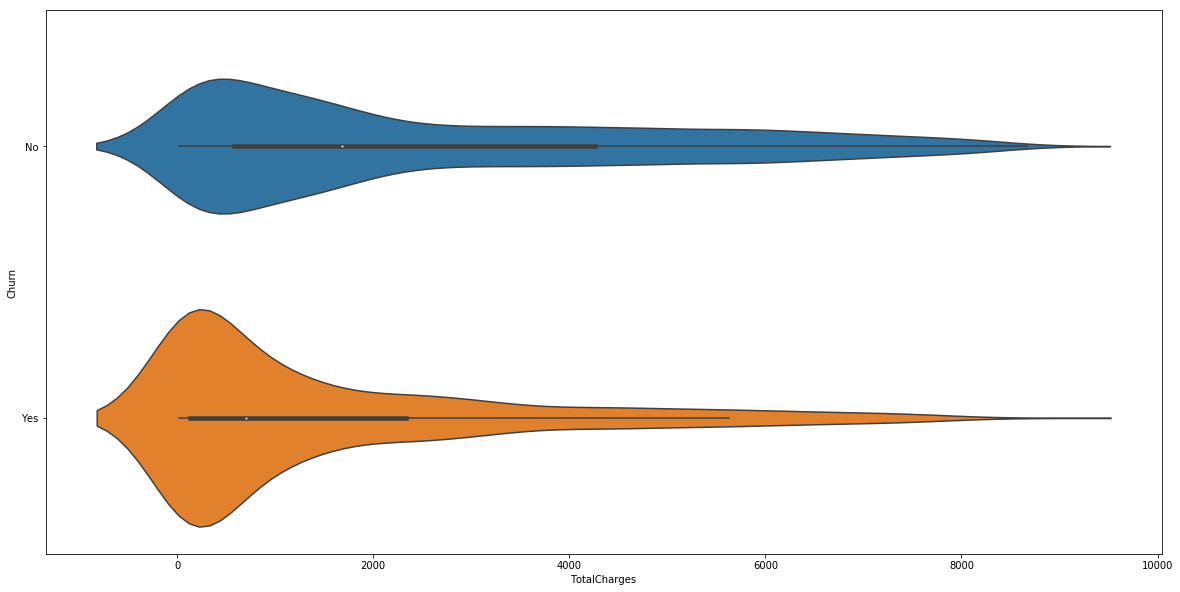

In [19]:
plt.figure(figsize=(20,10))
sns.violinplot(y=data.Churn,x=data.TotalCharges,orient='h')
print('The dots in the center of each violin plot represent median Total Charge of each group')
plt.show()

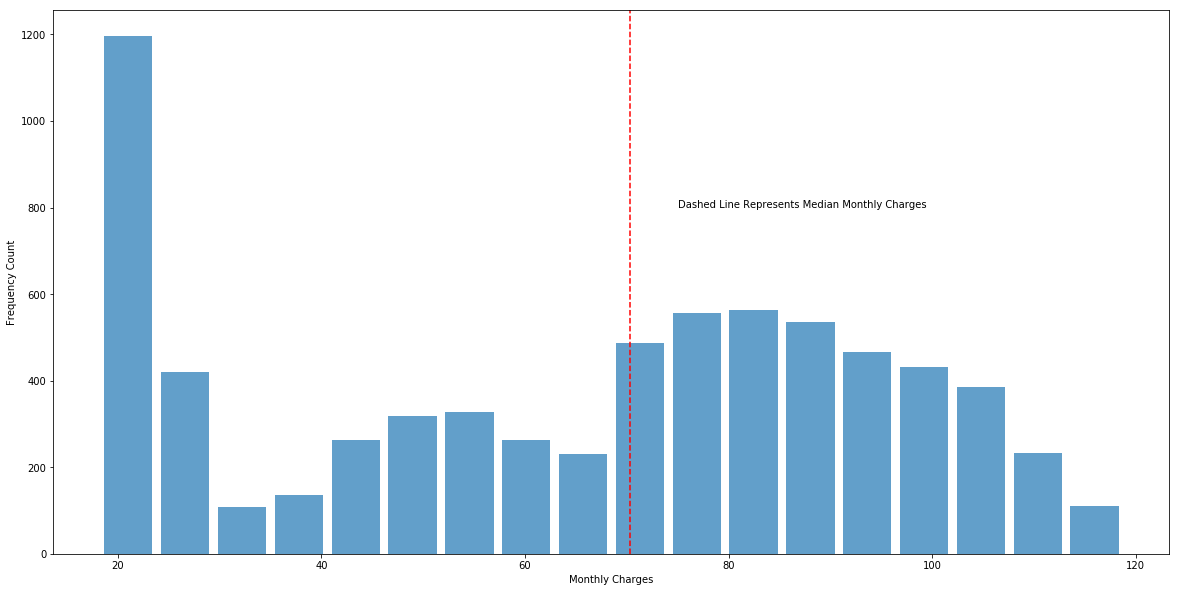

In [20]:
# Create Plot
plt.figure(figsize=(20,10))
n, bins, patches=plt.hist(data.MonthlyCharges,bins='auto', alpha=0.7, rwidth=0.85)
xlabel=plt.xlabel('Monthly Charges')
ylabel=plt.ylabel('Frequency Count')
plt.axvline(data.MonthlyCharges.median(), color='r',linestyle='dashed')
plt.text(75,800,'Dashed Line Represents Median Monthly Charges')
plt.show()

The dots in the center of each violin plot represent median Monthly Charge of each group


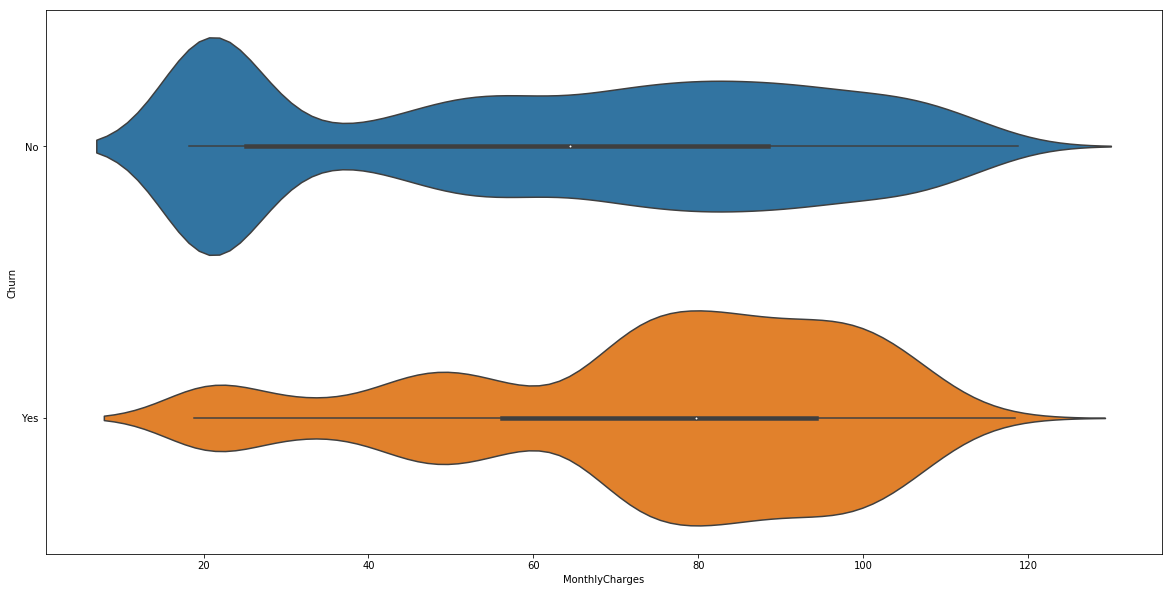

In [21]:
plt.figure(figsize=(20,10))
sns.violinplot(y=data.Churn,x=data.MonthlyCharges,orient='h')
print('The dots in the center of each violin plot represent median Monthly Charge of each group')
plt.show()

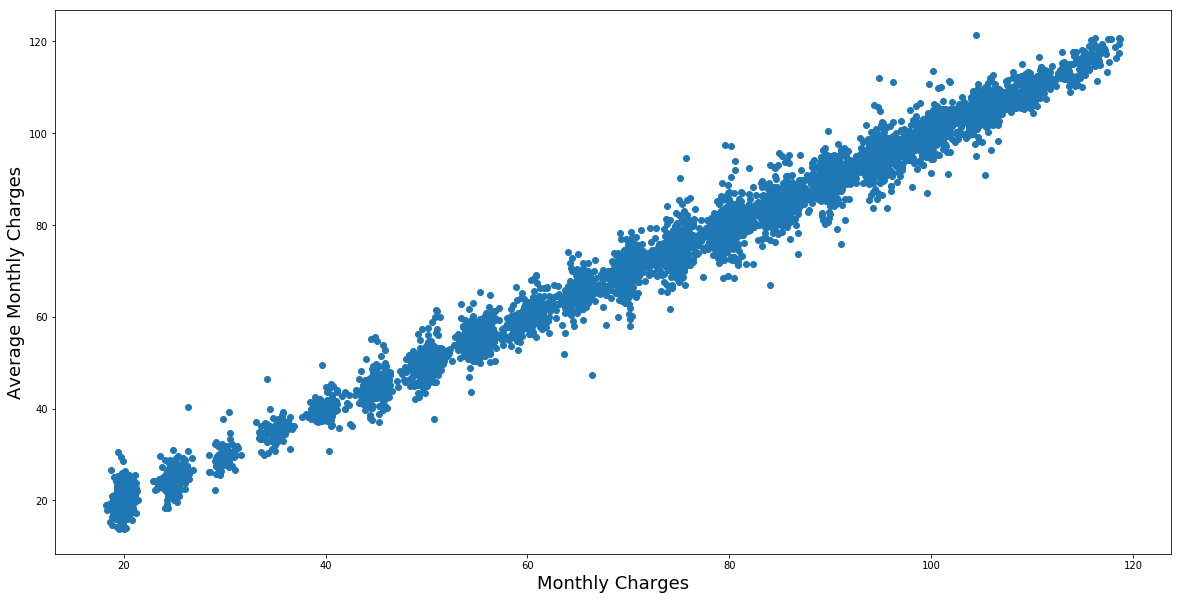

In [22]:
plt.figure(figsize=(20,10))
plt.scatter(data.MonthlyCharges, data.TotalCharges/data.tenure)
plt.xlabel('Monthly Charges', fontsize=18)
plt.ylabel('Average Monthly Charges',fontsize=18)
plt.show()

In [23]:
def stacked_plot(feature):
    binary=data.groupby('Churn')
    length=len(data[feature].unique())
    layers=[]
    for symbol, group in binary:
        sequence=group[feature].value_counts().index
        temp=[]
        try:
            for i in range(length):
                number=group[feature].value_counts()[i]
                temp.append(number)
        except:
            print('there\'s no case for at least one category ')
        temp=dict(zip(sequence,temp))
        layers.append(temp)
    names=data[feature].unique()
    no_churn_layer=[0]*len(names)
    churn_layer=[0]*len(names)
    position=np.arange(len(names))+1
    for i in range(len(names)):
        try:
            no_churn_layer[i]=layers[0][names[i]]
        except:
            no_churn_layer[i]=0
        try:
            churn_layer[i]=layers[1][names[i]]
        except:
            churn_layer[i]=0
        total=no_churn_layer[i]+churn_layer[i]
        no_churn_layer[i]=no_churn_layer[i]/total
        churn_layer[i]=churn_layer[i]/total
    plt.bar(position,no_churn_layer, edgecolor='white')
    plt.bar(position, churn_layer, bottom=no_churn_layer, edgecolor='white')
    plt.title(feature)
    plt.xticks(position, names, fontweight='bold')

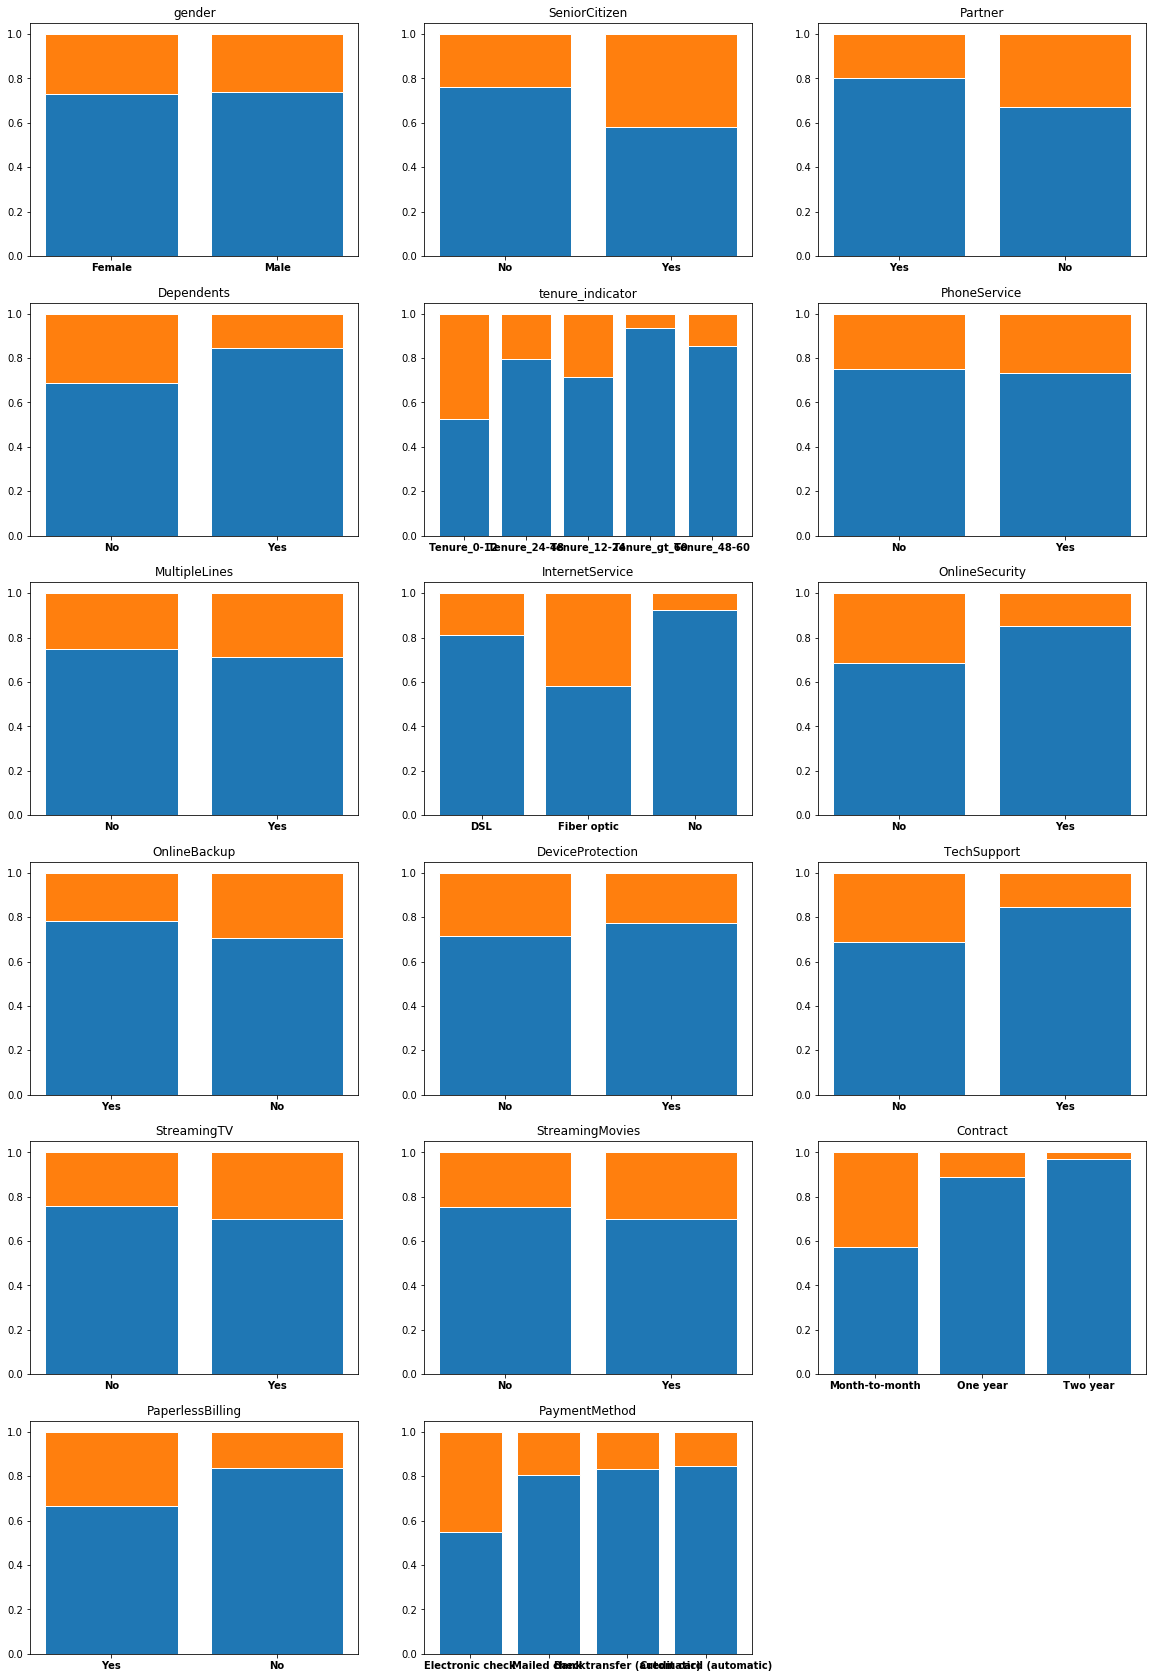

In [24]:
plt.figure(figsize=(20,30))
plt.subplot(6,3,1)
stacked_plot('gender')
plt.subplot(6,3,2)
stacked_plot('SeniorCitizen')
plt.subplot(6,3,3)
stacked_plot('Partner')
plt.subplot(6,3,4)
stacked_plot('Dependents')
plt.subplot(6,3,5)
stacked_plot('tenure_indicator')
plt.subplot(6,3,6)
stacked_plot('PhoneService')
plt.subplot(6,3,7)
stacked_plot('MultipleLines')
plt.subplot(6,3,8)
stacked_plot('InternetService')
plt.subplot(6,3,9)
stacked_plot('OnlineSecurity')
plt.subplot(6,3,10)
stacked_plot('OnlineBackup')
plt.subplot(6,3,11)
stacked_plot('DeviceProtection')
plt.subplot(6,3,12)
stacked_plot('TechSupport')
plt.subplot(6,3,13)
stacked_plot('StreamingTV')
plt.subplot(6,3,14)
stacked_plot('StreamingMovies')
plt.subplot(6,3,15)
stacked_plot('Contract')
plt.subplot(6,3,16)
stacked_plot('PaperlessBilling')
plt.subplot(6,3,17)
stacked_plot('PaymentMethod')
plt.show()

# Data Preprocessing

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null object
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
tenure_indicator    7032 non-nu

In [26]:
data_X=data.drop(columns=['customerID','Churn','tenure'])
data_Y=data.Churn

In [27]:
# One hot encoding for multi value columns
data_X=pd.get_dummies(data_X,columns=['InternetService','Contract','PaymentMethod','tenure_indicator'])

In [28]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
scaled=std.fit(data[['TotalCharges','MonthlyCharges']])

In [29]:
data_X[['TotalCharges','MonthlyCharges']]=scaled.transform(data_X[['TotalCharges','MonthlyCharges']])

In [30]:
from sklearn.preprocessing import LabelEncoder
bin_cols = data_X.nunique()[data_X.nunique() == 2].keys().tolist()
le=LabelEncoder()
for i in bin_cols:
    data_X[i]=le.fit_transform(data_X[i])

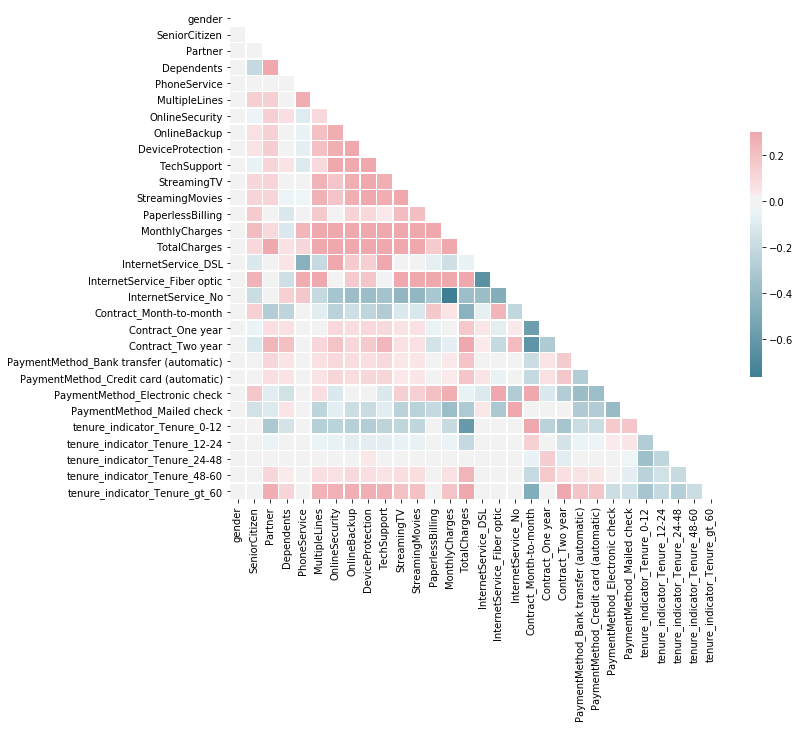

In [31]:
#correlation
corr = data_X.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
# Since for two groups (Churn and Not Churn), the numbers of these two features are equal. We dropped them.
data_X=data_X.drop(columns=['gender','PhoneService'])

In [33]:
# Replace Yes and No with 1 and 0
data_Y=data_Y.apply(lambda x: 1 if x == 'Yes' else 0)

In [34]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
SeniorCitizen                              7032 non-null int64
Partner                                    7032 non-null int64
Dependents                                 7032 non-null int64
MultipleLines                              7032 non-null int64
OnlineSecurity                             7032 non-null int64
OnlineBackup                               7032 non-null int64
DeviceProtection                           7032 non-null int64
TechSupport                                7032 non-null int64
StreamingTV                                7032 non-null int64
StreamingMovies                            7032 non-null int64
PaperlessBilling                           7032 non-null int64
MonthlyCharges                             7032 non-null float64
TotalCharges                               7032 non-null float64
InternetService_DSL                        7032 non-null int64
Interne

# Machine Learning Models

In [35]:
# Split the training data and testing data
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=100)

## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=100,class_weight='balanced',max_depth=10)
clf.fit(X_train,y_train)
# Make prediction
y_pred=clf.predict(X_test)
# Display Confusion Matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[774 239]
 [104 290]]
             precision    recall  f1-score   support

          0       0.88      0.76      0.82      1013
          1       0.55      0.74      0.63       394

avg / total       0.79      0.76      0.77      1407



In [37]:
estimator = clf.estimators_[4]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = data_X.columns,
                class_names = ['Not Churn','Churn'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'dot': 'dot'

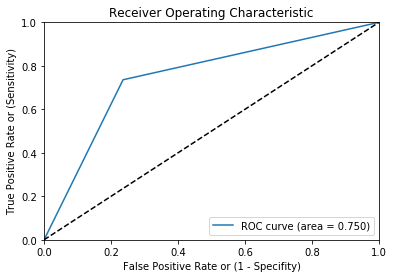

In [38]:
# plot a ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
roc_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [39]:
# Calculate the area under the curve (AUC)
print('AUC:', roc_auc.round(2))

AUC: 0.75


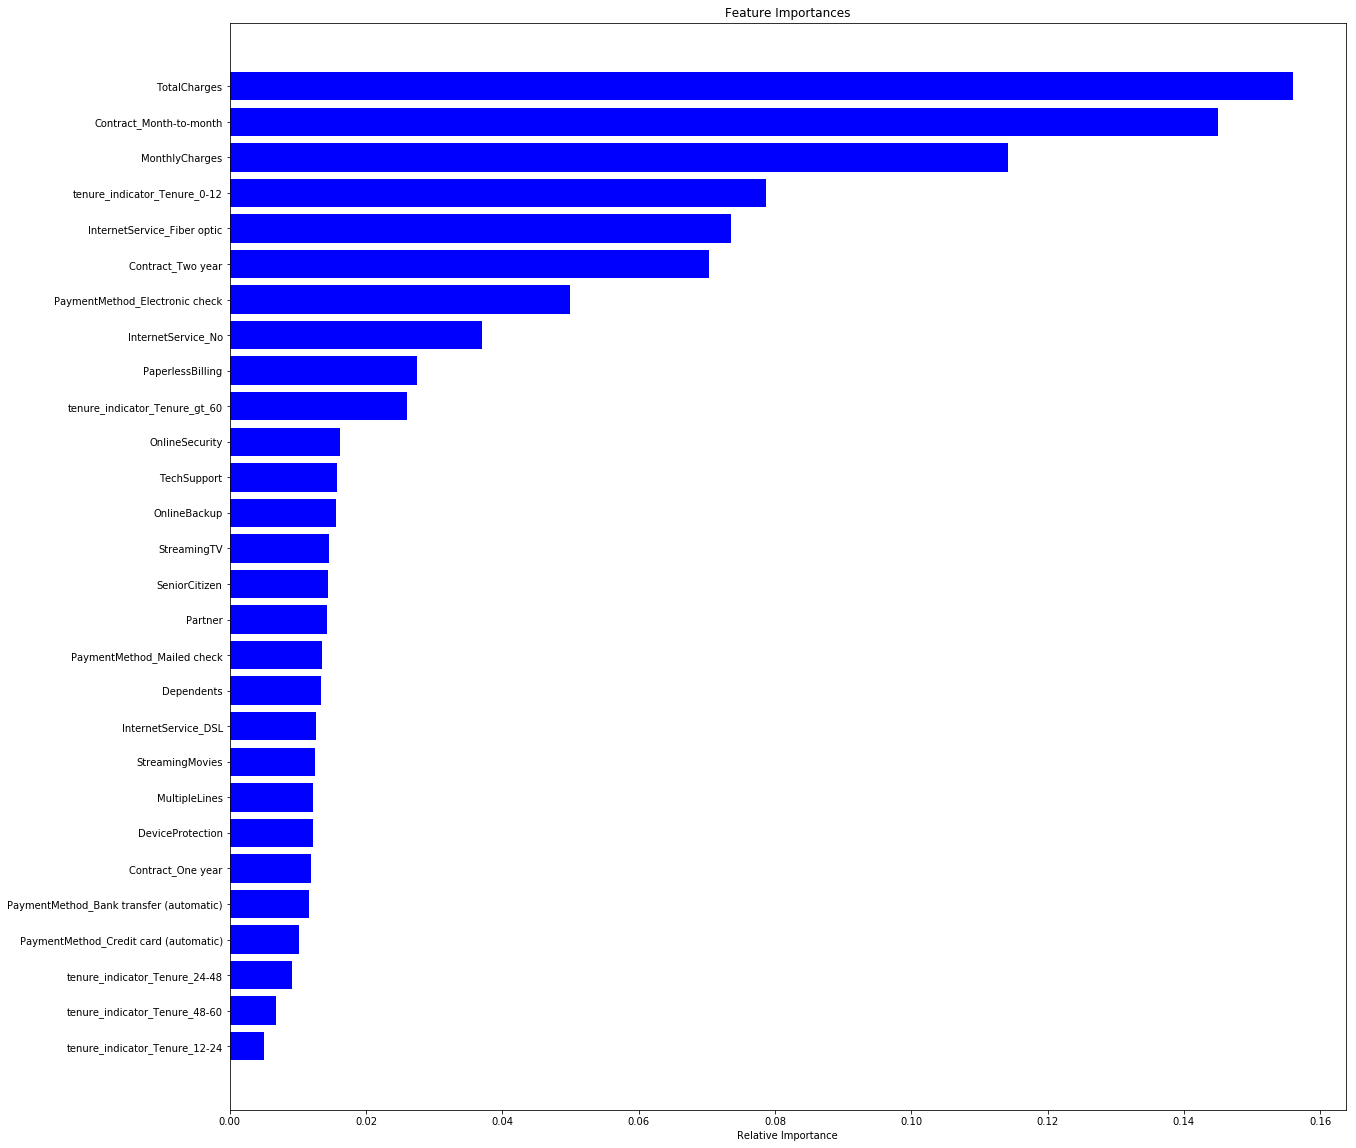

In [40]:
features=X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

## KNN Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=50,algorithm='ball_tree')
neigh.fit(X_train,y_train)
# Make prediction
y_pred=neigh.predict(X_test)
# Display Confusion Matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[882 131]
 [187 207]]
             precision    recall  f1-score   support

          0       0.83      0.87      0.85      1013
          1       0.61      0.53      0.57       394

avg / total       0.77      0.77      0.77      1407



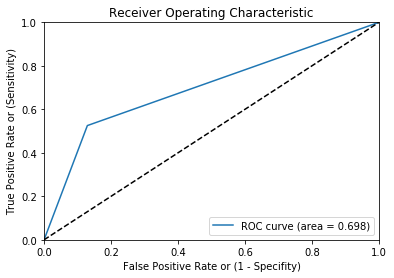

In [42]:
# plot a ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
roc_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [43]:
# Calculate the area under the curve (AUC)
print('AUC:', roc_auc.round(2))

AUC: 0.7


## Naive Bayes

In [44]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train, y_train)
# Make prediction
y_pred=nb.predict(X_test)
# Display Confusion Matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[794 219]
 [111 283]]
             precision    recall  f1-score   support

          0       0.88      0.78      0.83      1013
          1       0.56      0.72      0.63       394

avg / total       0.79      0.77      0.77      1407



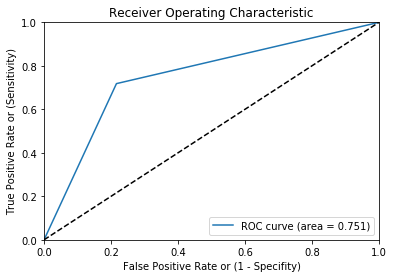

In [45]:
# plot a ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
roc_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [46]:
# Calculate the area under the curve (AUC)
print('AUC:', roc_auc.round(2))

AUC: 0.75


In [47]:
# Naive Bayes Output
class_probs=np.exp(nb.class_log_prior_)
print('the probability that the person doesn\'t churn: ', class_probs[0])
print('the probability that the person churns', class_probs[1])

the probability that the person doesn't churn:  0.7377777777777788
the probability that the person churns 0.2622222222222223


In [48]:
features_0=np.exp(nb.feature_log_prob_[0])
features_1=np.exp(nb.feature_log_prob_[1])
print('Condition probabilities given that the person doesn\'t churn')
for i in range(len(X_train.columns)):
    print(X_train.columns[i],': ',features_0[i])

print('\nCondition probabilities given that the person churns')
for i in range(len(X_train.columns)):
    print(X_train.columns[i],': ',features_1[i])

Condition probabilities given that the person doesn't churn
SeniorCitizen :  0.12403660886319859
Partner :  0.5207129094412335
Dependents :  0.3415221579961467
MultipleLines :  0.4072736030828518
OnlineSecurity :  0.33333333333333354
OnlineBackup :  0.37379576107899853
DeviceProtection :  0.3651252408477846
TechSupport :  0.3395953757225438
StreamingTV :  0.36368015414258226
StreamingMovies :  0.37090558766859366
PaperlessBilling :  0.5315510597302511
MonthlyCharges :  0.4942196531791912
TotalCharges :  0.42316955684007734
InternetService_DSL :  0.38078034682080975
InternetService_Fiber optic :  0.34513487475915255
InternetService_No :  0.27432562620423906
Contract_Month-to-month :  0.4275048169556845
Contract_One year :  0.2613198458574184
Contract_Two year :  0.3114161849710985
PaymentMethod_Bank transfer (automatic) :  0.2427745664739887
PaymentMethod_Credit card (automatic) :  0.25457610789980756
PaymentMethod_Electronic check :  0.24903660886319867
PaymentMethod_Mailed check :  0.

## Support Vector Machines

In [49]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
# Make prediction
y_pred=svc.predict(X_test)
# Display Confusion Matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[928  85]
 [234 160]]
             precision    recall  f1-score   support

          0       0.80      0.92      0.85      1013
          1       0.65      0.41      0.50       394

avg / total       0.76      0.77      0.75      1407



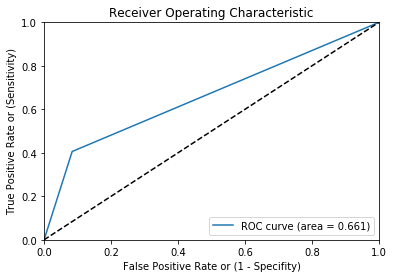

In [50]:
# plot a ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
roc_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [51]:
# Calculate the area under the curve (AUC)
print('AUC:', roc_auc.round(2))

AUC: 0.66
